In [1]:
import numpy as np
import scipy.io
import scipy.linalg
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model
import h5py    
from itertools import combinations
import cPickle as pickle
import os

%matplotlib inline

In [2]:
def save_object(obj, filename):
    """
    save as filename, increment run order to filename
    
    Parameters
    ----------
    obj : numpy array
    filename : str
    """
    i = 0
    while os.path.exists(filename + "_" + str(i) + ".pkl"):
        i += 1
    with open(filename + "_" + str(i) + ".pkl", 'wb') as output:  # Overwrites any existing file.
            pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
def load_object(filepath):
    """
    load data
    
    Parameters
    ----------
    filepath : str
    """
    if os.path.exists(filepath):
        with open(filepath) as file_input:
            return pickle.load(file_input)
    else:
        return None

In [6]:
rat_ids = ['R32_B7','R18_B12','R19_B11','R6_B10','R6_B12']
rat_dir = "/Users/iMax/data/ToneAnalysisDatasets/"

###############  CHANGE THIS!
rat_id = rat_ids[0]

rat_file = rat_dir + rat_id + '.WVL_CAR1.TN.RspM_TM.mat'
f1 = h5py.File(rat_file,'r+') 

In [7]:
#RspM is tone response matrix of canonical neural freq bands 
#stimVls amplitudes and frequencies
f1.keys()

[u'RspM', u'stimVls']

In [8]:
f1['RspM'].keys()

[u'B', u'G', u'HG', u'MUAR', u'Spk', u'UHG']

In [9]:
#101 timepoints 4800 samples (30 freq * 8 amplitude 20 stim samples) 128 electrodes

f1['RspM']['HG']

<HDF5 dataset "HG": shape (101, 4800, 160), type "<f8">

In [10]:
#2 ampl (value/10) and freq, 4800 samples corresponding to before
f1['stimVls']

<HDF5 dataset "stimVls": shape (2, 4800), type "<f8">

In [12]:
freq_bands = [u'B', u'G', u'HG', u'MUAR', u'Spk', u'UHG']

#this is where we would change the high gamma
###########Change THIS!!!!!!!!
freq_band = freq_bands[2]

data = np.array(f1['RspM'][freq_band])
stim_vals = np.array(f1['stimVls'])

####### this is needed for other rats? (for best frequencies)
f2 = h5py.File(rat_dir + 'TN.FRA.anl.mat','r+')
data2 = f2['frall'][freq_band][rat_id]

results = []

In [17]:

##########CHANGE THIS!!!!!!!!!
save_dir = '/Users/iMax/data/nc_analysis/results/' + rat_id + '/' + freq_band + '/'

In [18]:
f2['frall']['HG'][rat_id]['bf_fra']

<HDF5 dataset "bf_fra": shape (1, 126), type "<f8">

In [19]:
#101 timepoints 4800 samples (30 freq * 8 amplitude 20 stim samples) 128 electrodes
print data.shape
#2 ampl (value/10) and freq, 4800 samples corresponding to before
print stim_vals.shape

(101, 4800, 160)
(2, 4800)


In [20]:
#########TODO: IS THIS DOING ANYTHING?
for dir_1 in rat_ids:
    for dir_2 in freq_bands:
        directory = 'results/' + dir_1 + '/' + dir_2 + '/runs/'
        if not os.path.exists(directory):
            os.makedirs(directory)

In [22]:
# take max of 39 to 79 for 101 timepoints
# amplitudes -1 and -2 as two speperate trialsy

In [23]:
#f2['frall'].keys()
#data2.keys()

In [24]:
#best frequencies
bf_val = np.array(data2['bf_fra'])
print bf_val.shape

(1, 126)


In [25]:
#specific electrode
electrode_number = np.array(data2['fb_tuned'])

In [26]:
print electrode_number

[[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
    13.   14.   15.   16.   17.   18.   19.   21.   23.   24.   25.   26.
    27.   28.   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.
    39.   40.   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.
    51.   52.   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.
    63.   64.   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.
    75.   76.   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.
    87.   88.   89.   90.   91.   92.   93.   94.   95.   96.   97.   98.
    99.  100.  101.  102.  103.  104.  105.  106.  107.  108.  109.  110.
   111.  112.  113.  114.  115.  116.  117.  118.  119.  120.  121.  122.
   123.  124.  125.  126.  127.  128.]]


In [27]:
bf_electrodes = [[i[1],i[0]] for i in zip(list(bf_val.flatten()),list(electrode_number.flatten()))]

In [28]:
time_length,amp_fq_length, total_electrode_length = data.shape

In [29]:
bf_el = np.array(bf_electrodes)
electrode_length = bf_el.shape[0]

(101, 4800, 160)


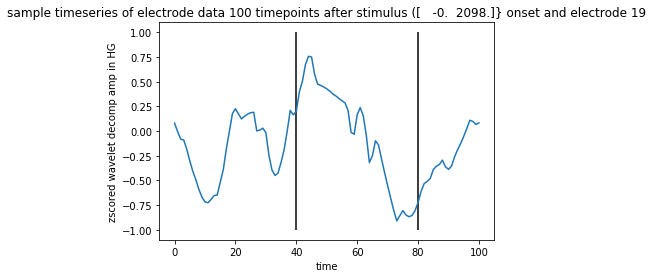

In [30]:
print data.shape
#need to use stim_vals to figure out the corresponding stim
sample_number = 4004
electrode_number = 19
plt.plot(data[:,sample_number,electrode_number])


plt.vlines([40,80],-1,1)

plt.xlabel('time')
plt.ylabel('zscored wavelet decomp amp in '+ freq_band)
plt.title("sample timeseries of electrode data 100 timepoints after stimulus (" + str(stim_vals[:,sample_number]) + "} onset and electrode "+ str(electrode_number))
plt.show()

In [31]:
peak_response = np.zeros((4800,total_electrode_length))

# peak response calculated for 40 to 80 sample points after stimulus onset

##### Potential CHANGE ???!!!!
#does 40 to 80!
for i in xrange(amp_fq_length):
    for j in xrange(total_electrode_length):    
        peak_response[i][j] = np.max(data[40:80,i,j])


In [32]:
print peak_response.shape

(4800, 160)


In [33]:
electrodes_used = [int(x) for x in list(bf_el[:,0] -1)]

uniq_freqs = np.sort(list(set(stim_vals[1,:])))
uniq_amps = np.sort(list(set(stim_vals[0,:])))

num_of_freq = len(uniq_freqs)
num_of_amp = len(uniq_amps)
num_of_stims = 20
num_of_electrodes = len(electrodes_used)
num_of_stims_used = 40
num_of_samples = 20*2

In [34]:
print 'bf_el', bf_el.shape, ": 126 electrodes, (electrode number, best frequency)"
print 'peak_response', peak_response.shape, ": 4800 samples (30 freq * 8 amplitude 20 stim samples), 128 electrodes"
print 'stim_vals', stim_vals.shape, ": (stim amplitude, stim frequency), 4800 samples (30 freq * 8 amplitude 20 stim samples)"
print 'electrodes_used', num_of_electrodes, ": list of integer values of electrodes actually used"

print 'electrode_length: ',electrode_length
print 'amp_fq_length: ', amp_fq_length
print 'time_length: ', time_length
print 'total_electrode_length: ', total_electrode_length


print 'num_of_amp: ', num_of_amp
print 'num_of_freq: ', num_of_freq
print 'num_of_stims: ', num_of_stims
print 'num_of_stims_used', num_of_stims_used
print 'num_of_samples', num_of_samples

bf_el (126, 2) : 126 electrodes, (electrode number, best frequency)
peak_response (4800, 160) : 4800 samples (30 freq * 8 amplitude 20 stim samples), 128 electrodes
stim_vals (2, 4800) : (stim amplitude, stim frequency), 4800 samples (30 freq * 8 amplitude 20 stim samples)
electrodes_used 126 : list of integer values of electrodes actually used
electrode_length:  126
amp_fq_length:  4800
time_length:  101
total_electrode_length:  160
num_of_amp:  8
num_of_freq:  30
num_of_stims:  20
num_of_stims_used 40
num_of_samples 40


In [36]:
final_response = np.zeros((num_of_electrodes,num_of_stims,num_of_freq,num_of_amp))

file_path = save_dir + 'final_response' + '_0.pkl'

#enter the for-loop of doom // to clean
if not os.path.exists(file_path):
    #cycle electrodes 
    for electrode_counter, electrode_num in enumerate(electrodes_used):
        stim_counter = np.zeros((num_of_freq,num_of_amp))
        #cycle 4800 samples (30 freq * 8 amplitude 20 stim samples) for stim_vals
        for amp_fq_num in xrange(amp_fq_length):
            #cycle through volume amplitudes
            for amp_counter, amp in enumerate(uniq_amps):
                #cycle through stimulus frequencies
                for freq_counter, freq in enumerate(uniq_freqs):
                    #integrating two data sets from stim_vals and peak_response
                    if stim_vals[0,amp_fq_num]== amp and stim_vals[1,amp_fq_num] == freq:
                        #print electrode_num, stim_counter, freq_counter, amp_counter, amp_fq_num, peak_response[amp_fq_num,electrode_num] 
                        final_response[electrode_counter,int(stim_counter[freq_counter,amp_counter]),freq_counter,amp_counter] = peak_response[amp_fq_num,electrode_num]
                        #this number should equal the number of stimuli, e.g. 20
                        stim_counter[freq_counter,amp_counter] = stim_counter[freq_counter,amp_counter]+1
                        #print stim_counter[freq_counter,amp_counter]
        print "passed electrode", electrode_num
        
    save_object(final_response,save_dir + 'final_response')
    print "final_response saved"
else:
    final_response = load_object(file_path)
    print "final_response loaded"
print len(set(stim_vals[1,:]))


final_response loaded
30


In [37]:
#electrode number, frequency with largest response
#calculated by looking at the freq-amp tuning map for each electrode and taking a weighted average
print bf_el

[[   1.           21.01785714]
 [   2.           22.71428571]
 [   3.           24.05714286]
 [   4.           22.84210526]
 [   5.           24.59375   ]
 [   6.           24.        ]
 [   7.           24.07843137]
 [   8.           23.        ]
 [   9.           22.86842105]
 [  10.           21.95833333]
 [  11.           23.78947368]
 [  12.           22.34782609]
 [  13.           24.45454545]
 [  14.           23.48979592]
 [  15.           24.26086957]
 [  16.           23.61290323]
 [  17.           11.9       ]
 [  18.           21.03571429]
 [  19.           11.15625   ]
 [  21.           15.38983051]
 [  23.           20.07142857]
 [  24.           23.06779661]
 [  25.            8.48      ]
 [  26.           18.22580645]
 [  27.            6.5       ]
 [  28.           18.06666667]
 [  29.           11.42424242]
 [  30.           20.425     ]
 [  31.           17.22857143]
 [  32.           21.89189189]
 [  33.           12.83333333]
 [  34.            6.5       ]
 [  35. 

In [38]:
#sorting to get electrodes with corresponding sorted electrodes
electrode_bestfreq_sort_correspondence = np.argsort(bf_el, axis = 0)
print electrode_bestfreq_sort_correspondence

[[  0  37]
 [  1  49]
 [  2  47]
 [  3  33]
 [  4  51]
 [  5  53]
 [  6  31]
 [  7  39]
 [  8  35]
 [  9  24]
 [ 10  46]
 [ 11  48]
 [ 12  50]
 [ 13  36]
 [ 14  74]
 [ 15  38]
 [ 16  22]
 [ 17  72]
 [ 18  76]
 [ 19  34]
 [ 20  32]
 [ 21  52]
 [ 22 100]
 [ 23  18]
 [ 24  26]
 [ 25  40]
 [ 26  77]
 [ 27  16]
 [ 28  98]
 [ 29  75]
 [ 30  30]
 [ 31 108]
 [ 32  73]
 [ 33  70]
 [ 34  55]
 [ 35 106]
 [ 36  19]
 [ 37  44]
 [ 38  42]
 [ 39  41]
 [ 40 101]
 [ 41  28]
 [ 42  99]
 [ 43  45]
 [ 44  43]
 [ 45  61]
 [ 46  79]
 [ 47  60]
 [ 48  25]
 [ 49  87]
 [ 50  96]
 [ 51  23]
 [ 52  59]
 [ 53  93]
 [ 54  81]
 [ 55  57]
 [ 56  62]
 [ 57  78]
 [ 58  63]
 [ 59  54]
 [ 60  80]
 [ 61  64]
 [ 62 110]
 [ 63  65]
 [ 64  83]
 [ 65 102]
 [ 66 104]
 [ 67  58]
 [ 68  67]
 [ 69 122]
 [ 70  85]
 [ 71  84]
 [ 72  56]
 [ 73  66]
 [ 74  20]
 [ 75 107]
 [ 76  82]
 [ 77 116]
 [ 78  71]
 [ 79 109]
 [ 80  69]
 [ 81  27]
 [ 82 105]
 [ 83  68]
 [ 84   0]
 [ 85  17]
 [ 86  89]
 [ 87 118]
 [ 88  90]
 [ 89  97]
 [ 90  95]

In [39]:
bf_el[electrode_bestfreq_sort_correspondence[:,1]]

array([[  40.        ,    6.        ],
       [  52.        ,    6.        ],
       [  50.        ,    6.2       ],
       [  36.        ,    6.4       ],
       [  54.        ,    6.4       ],
       [  56.        ,    6.5       ],
       [  34.        ,    6.5       ],
       [  42.        ,    6.5       ],
       [  38.        ,    6.5       ],
       [  27.        ,    6.5       ],
       [  49.        ,    6.5       ],
       [  51.        ,    6.5       ],
       [  53.        ,    7.        ],
       [  39.        ,    7.5       ],
       [  77.        ,    8.        ],
       [  41.        ,    8.08333333],
       [  25.        ,    8.48      ],
       [  75.        ,    8.5       ],
       [  79.        ,    8.5       ],
       [  37.        ,    8.82758621],
       [  35.        ,    9.4       ],
       [  55.        ,   10.16216216],
       [ 103.        ,   10.60784314],
       [  19.        ,   11.15625   ],
       [  29.        ,   11.42424242],
       [  43.        ,   

In [40]:
#electrodes organized by electrode best frequency
sorted_response = final_response[electrode_bestfreq_sort_correspondence[:,1]]

In [41]:
#electrode, sample, stim_freq, stim_amp
final_response.shape

(126, 20, 30, 8)

In [42]:
#######Potential change try with out Z SCORING !!!!!!!!!!!!

print "min/max best freq vals:", np.min(bf_el[:,1]),np.max(bf_el[:,1])
# rearraged so (126 electrodes, 20 samples, 30 stimuli, 8 attenuations) turn into
# (40 samples from -10 and -20 attenuations, 126 electrodes, 19 frequecies within electrode best freq vals)
# number of frequecies within electrode best freq vals
b_stim_start = int(np.min(bf_el[:,1]))
b_stim_end = int(np.max(bf_el[:,1])+1)
num_of_best_stims = b_stim_end - b_stim_start

print 'num_of_stims_used: ', num_of_stims_used
print 'num_of_best_stims: ', num_of_best_stims

#collect only -10 and -20 attenuations
#use only stimuli whose freqs are within electrode best freq values 
focused_response = np.transpose(final_response,(1,3,0,2))[:,5:7,:,b_stim_start:b_stim_end].reshape(num_of_stims_used,num_of_electrodes,-1)

#mean and std calculated for each electrode accross all peak responses
peak_electrode_mean = np.dot(np.mean(final_response[:,:,:,5:7].reshape(num_of_electrodes,-1),axis =1).reshape(num_of_electrodes,1),np.ones([1,num_of_stims_used*num_of_best_stims]))
peak_electrode_std = np.dot(np.std(final_response[:,:,:,5:7].reshape(num_of_electrodes,-1),axis =1).reshape(num_of_electrodes,1),np.ones([1,num_of_stims_used*num_of_best_stims]))
peak_electrode_mean = np.transpose(peak_electrode_mean.reshape(num_of_electrodes,40,num_of_best_stims),(1,0,2))
peak_electrode_std = np.transpose(peak_electrode_std.reshape(num_of_electrodes,40,num_of_best_stims),(1,0,2))

print focused_response.shape
print peak_electrode_mean.shape
print peak_electrode_std.shape
#z-scored electrode peak response values

###### IF YOU DON'T WANT ZSCORE GET RID OF MEAN AND STD
########## POTENTIAL CHANGE COMMENT OUT!!!!!
focused_response = ((focused_response-peak_electrode_mean)/peak_electrode_std)

min/max best freq vals: 6.0 24.59375
num_of_stims_used:  40
num_of_best_stims:  19
(40, 126, 19)
(40, 126, 19)
(40, 126, 19)


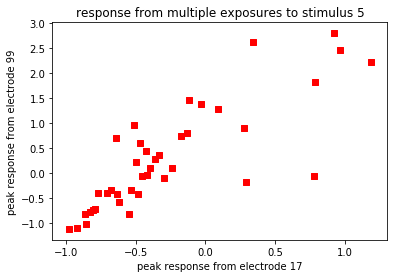

In [43]:
el_x = 17
el_y = 99

stim_1 = 5

plt.scatter(x=focused_response[:,el_x,stim_1].flatten(),y=focused_response[:,el_y,stim_1].flatten(),c='red',marker='s')
plt.xlabel('peak response from electrode ' + str(el_x))
plt.ylabel('peak response from electrode ' + str(el_y))
plt.title('response from multiple exposures to stimulus ' + str(stim_1))
plt.show()

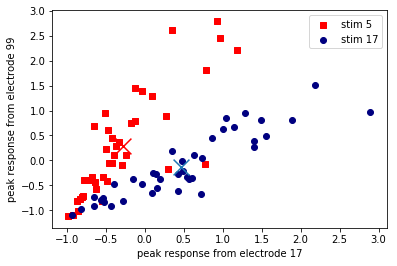

In [44]:
el_x = 17
el_y = 99

stim_1 = 5
stim_2 = 17

plt.scatter(x=focused_response[:,el_x,stim_1].flatten(),y=focused_response[:,el_y,stim_1].flatten(),c='red',marker='s',label='stim '+str(stim_1))
plt.scatter(x=focused_response[:,el_x,stim_2].flatten(),y=focused_response[:,el_y,stim_2].flatten(),c='navy',label = 'stim '+str(stim_2))
plt.scatter(x=np.mean(focused_response[:,el_x,stim_1]).flatten(),y=np.mean(focused_response[:,el_y,stim_1].flatten()),marker='x',s=250, c ='red')
plt.scatter(x=np.mean(focused_response[:,el_x,stim_2]).flatten(),y=np.mean(focused_response[:,el_y,stim_2].flatten()),marker='x',s=250)
plt.legend()

plt.xlabel('peak response from electrode ' + str(el_x))
plt.ylabel('peak response from electrode ' + str(el_y))
plt.show()

In [45]:
#permuting accross samples within electrode and stimuli
decor_focused_response = np.zeros(focused_response.shape)
for i in range(focused_response.shape[2]):
    for j in range(focused_response.shape[1]):
        sample_perm = np.random.permutation(np.array(range(40)))
        #sample_perm = np.array(range(40))
        for k in range(focused_response.shape[0]):
            decor_focused_response[k,j,i]=focused_response[sample_perm[k],j,i]

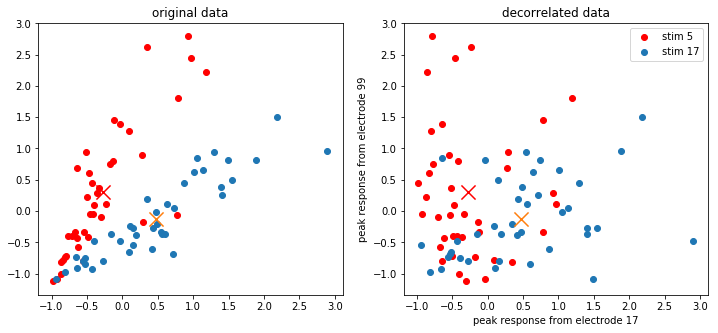

In [46]:
f, axarr = plt.subplots(1, 2,figsize=(12,5))
el_x = 17
el_y = 99

stim_1 = 5
stim_2 = 17
# add a print with fr_stim_vals[stim_1],fr_stim_vals[stim_2]


axarr[0].scatter(x=focused_response[:,el_x,stim_1].flatten(),y=focused_response[:,el_y,stim_1].flatten(),c='red')
axarr[0].scatter(x=focused_response[:,el_x,stim_2].flatten(),y=focused_response[:,el_y,stim_2].flatten())
axarr[0].scatter(x=np.mean(focused_response[:,el_x,stim_1]),y=np.mean(focused_response[:,el_y,stim_1]),marker='x',s=200, c ='red')
axarr[0].scatter(x=np.mean(focused_response[:,el_x,stim_2]),y=np.mean(focused_response[:,el_y,stim_2]),marker='x',s=200)
axarr[0].set_title("original data")

axarr[1].scatter(x=decor_focused_response[:,el_x,stim_1].flatten(),y=decor_focused_response[:,el_y,stim_1].flatten(),c='red',label='stim '+str(stim_1))
axarr[1].scatter(x=decor_focused_response[:,el_x,stim_2].flatten(),y=decor_focused_response[:,el_y,stim_2].flatten(),label='stim '+str(stim_2))

axarr[1].scatter(x=np.mean(decor_focused_response[:,el_x,stim_1]).flatten(),y=np.mean(decor_focused_response[:,el_y,stim_1].flatten()),marker='x',s=200, c ='red')
axarr[1].scatter(x=np.mean(decor_focused_response[:,el_x,stim_2]).flatten(),y=np.mean(decor_focused_response[:,el_y,stim_2].flatten()),marker='x',s=200)
axarr[1].set_title("decorrelated data")
plt.xlabel('peak response from electrode ' + str(el_x))
plt.ylabel('peak response from electrode ' + str(el_y))
plt.legend()

plt.show()

# print discrim_value(focused_response[:,[el_x,el_y],:],stim_1,stim_2)
# print discrim_value(decor_focused_response[:,[el_x,el_y],:],stim_1,stim_2)

# print discrim_value(focused_response,stim_1,stim_2)
# print discrim_value(decor_focused_response,stim_1,stim_2)


In [39]:
# discrim_fr_values = np.zeros((18,18))
# discrim_uncor_values = np.zeros((18,18))
# discrim_decor_values = np.zeros((18,18))
# test = np.zeros((18,18))
# for i in range(18):
#     print "loop", i
#     for j in range(18):
#         if i+j < 18:
#             discrim_fr_values[i,j] = discrim_value(focused_response,i,i+j+1)-discrim_value(decor_focused_response,i,i+j+1)
#             discrim_uncor_values[i,j] = discrim_value(focused_response,i,i+j+1)
#             discrim_decor_values[i,j] = discrim_value(decor_focused_response,i,i+j+1)

In [40]:
# epochs = 1

# discrim_statistics = np.zeros((epochs,2,num_of_best_stims-1))

# for epoch in xrange(epochs):
#     print epoch
#     decor_focused_response = np.zeros(focused_response.shape)
#     for i in range(focused_response.shape[2]):
#         for j in range(focused_response.shape[1]):
#             sample_perm = np.random.permutation(np.array(range(40)))
#             for k in range(focused_response.shape[0]):
#                 decor_focused_response[k,j,i]=focused_response[sample_perm[k],j,i]

#     discrim_fr_values = np.zeros((num_of_best_stims-1,num_of_best_stims-1))
#     for i in range(num_of_best_stims-1):        
#         for j in range(num_of_best_stims-1):
#             if i+j < num_of_best_stims-1:
#                 discrim_fr_values[i,j] = discrim_value(focused_response,i,i+j+1)-discrim_value(decor_focused_response,i,i+j+1)

#     discrim_statistics[epoch,0,:] = np.array([np.mean(discrim_fr_values.transpose()[i][0:num_of_best_stims-1-i]) for i in range(num_of_best_stims-1)])
#     discrim_statistics[epoch,1,:] = np.array([np.std(discrim_fr_values.transpose()[i][0:num_of_best_stims-1-i]) for i in range(num_of_best_stims-1)])

In [47]:
#transposing focused and decor response
mod_f_resp = focused_response.transpose((0,2,1))

dec_mod_f_resp = decor_focused_response.transpose((0,2,1))

In [48]:
#### JAMES GO THROUGH THIS!!!!!!

def pair_el_discrim_value(responses,stim_1, stim_2, electrodes, n_samples = 40, cutoff = False,adjust_volume = False):
    ###### COMMENT MORE!!!!!!
    
    #trial avg response to stimulus
    n1 = np.mean(responses[:,electrodes,stim_1],axis = 0)
    n2 = np.mean(responses[:,electrodes,stim_2],axis = 0)
    #print n1, n1.shape
    #print n2, n2.shape
    cov = np.cov(responses[:,electrodes,:][:,:,[stim_1,stim_2]].transpose((0,2,1)).reshape(n_samples*2,-1).transpose())
    #print cov, cov.shape
    #cov_inv = np.linalg.inv(cov)
    #print cov_inv, cov_inv.shape
    volume_factor = 1
    if adjust_volume:
        ### Think about volume factor
        volume_factor = np.sqrt(np.linalg.det(cov)/np.linalg.det(np.diag(np.diag(cov))))
    value = np.dot((n2-n1).transpose(),np.dot(np.linalg.inv(cov),(n2-n1))) 
    decor_value = np.dot((n2-n1).transpose(),np.dot(np.linalg.inv(np.diag(np.diag(cov*volume_factor))),(n2-n1)))
    return value, decor_value
#, np.dot((n2-n1).transpose(),np.dot(np.linalg.inv(np.diagonal(cov)),(n2-n1))

In [49]:
stim_pairs = []
electrode_pairs = []

for (i,j) in combinations(range(num_of_best_stims),2):
    stim_pairs.append((i,j))
for (i,j) in combinations(range(num_of_electrodes),2):
    electrode_pairs.append((i,j))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


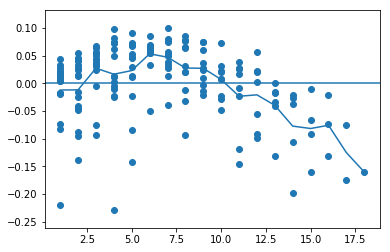

In [50]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []

count = 0
pair_scores_dict = {}
scores = []
test_dict = {}
electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

meathod = "linear discrim"
adjust_volume = False

#meathod = "log regression"


for (i,j) in stim_pairs:
    print count
    count += 1

    stim_1 = i
    stim_2 = j

    org_score = []
    decor_score = []
    for el_comb in electrode_pairs:
    #for el_comb in electrode_combinations:
        if meathod == "linear discrim":
            org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]],adjust_volume=adjust_volume)
            org_score.append(org_score_val)
            decor_score.append(decor_score_val)
        
        if meathod == "log regression":
            model = sklearn.linear_model.LogisticRegression()
            model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples))
            org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples)))

            model = sklearn.linear_model.LogisticRegression()
            model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples))
            decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples)))


    discrim_x_examp.append(float(j-i))
    discrim_y_examp.append(np.mean(np.array(org_score)-np.mean(np.array(decor_score))))
    if not pair_scores_dict.has_key(j-i):
        pair_scores_dict[j-i] = []
    pair_scores_dict[j-i].append([np.mean(np.array(org_score)),np.mean(np.array(decor_score)),np.array(org_score),np.array(decor_score)])
    #
    scores.append([org_score,decor_score])
    if not test_dict.has_key(j-i):
        test_dict[j-i] = []
    test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))

    

    discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
    discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
#plt.plot([i for i in pair_scores_dict],[np.mean(np.array(pair_scores_dict[i][0]) - np.array(pair_scores_dict[i][1])) for i in pair_scores_dict])
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.axhline(0)
plt.show()

#scores has structure scores[stim_pair][orig,decor][electrode_pair]
if results == [] or np.any(results[-1][0] != decor_focused_response):
    results.append([decor_focused_response, scores, meathod])

#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

In [51]:
np.array(scores).shape

(171, 2, 7875)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


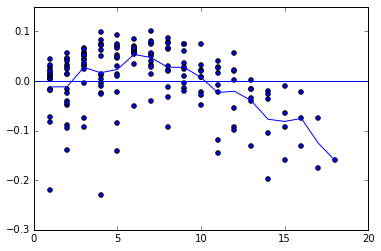

In [41]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []

count = 0
pair_scores_dict = {}
scores = []
test_dict = {}
electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

meathod = "linear discrim"
adjust_volume = False
#meathod = "log regression"


for (i,j) in stim_pairs:
    print count
    count += 1

    stim_1 = i
    stim_2 = j

    org_score = []
    decor_score = []
    for el_comb in electrode_pairs:
    #for el_comb in electrode_combinations:
        if meathod == "linear discrim":
            org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]],adjust_volume=adjust_volume)
            org_score.append(org_score_val)
            decor_score.append(decor_score_val)
        
        if meathod == "log regression":
            model = sklearn.linear_model.LogisticRegression()
            model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples))
            org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples)))

            model = sklearn.linear_model.LogisticRegression()
            model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples))
            decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_of_samples*2,-1),np.array([-10]*num_of_samples+[10]*num_of_samples)))


    discrim_x_examp.append(float(j-i))
    discrim_y_examp.append(np.mean(np.array(org_score)-np.mean(np.array(decor_score))))
    if not pair_scores_dict.has_key(j-i):
        pair_scores_dict[j-i] = []
    pair_scores_dict[j-i].append([np.mean(np.array(org_score)),np.mean(np.array(decor_score)),np.array(org_score),np.array(decor_score)])
    #
    scores.append([org_score,decor_score])
    if not test_dict.has_key(j-i):
        test_dict[j-i] = []
    test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))

    

    discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
    discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
#plt.plot([i for i in pair_scores_dict],[np.mean(np.array(pair_scores_dict[i][0]) - np.array(pair_scores_dict[i][1])) for i in pair_scores_dict])
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.axhline(0)
plt.show()

#scores has structure scores[stim_pair][orig,decor][electrode_pair]
if results == [] or np.any(results[-1][0] != decor_focused_response):
    results.append([decor_focused_response, scores, meathod])

#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


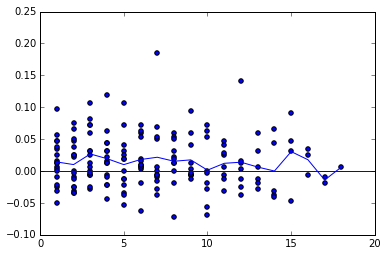

In [43]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []
discrim_electrodes = []
discrim_stims =[]
count = 0
test_dict = {}

electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

for i in range(18):
    for j in range(19):
        if i<j:
            print count
            count += 1

            org_score = []
            decor_score = []
            #for el_comb in combinations(range(num_of_electrodes),2):
            for el_comb in electrode_combinations:
                stim_1 = i
                stim_2 = j
                num_samples = 40
                #org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]])
                #org_score.append(org_score_val)
                #decor_score.append(decor_score_val)
                model = sklearn.linear_model.LogisticRegression()
                model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
                
                model = sklearn.linear_model.LogisticRegression()
                model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
            
            #discrim_electrodes.append(el_comb)
            discrim_stims.append((stim_1,stim_2))
            discrim_x_examp.append(float(j-i))
            discrim_y_examp.append(np.mean(np.array(org_score)-np.array(decor_score)))
            if not test_dict.has_key(j-i):
                test_dict[j-i] = []
            test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))
            if not scores.has_key((i,j)):
                
            
            
            discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
            discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.axhline(0)
plt.show()


#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

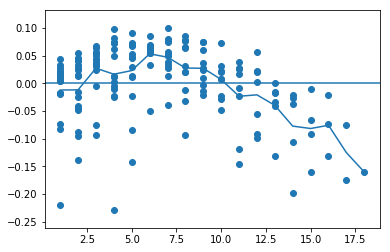

In [52]:
#test_dict_logreg = test_dict.copy()
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.axhline(0)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


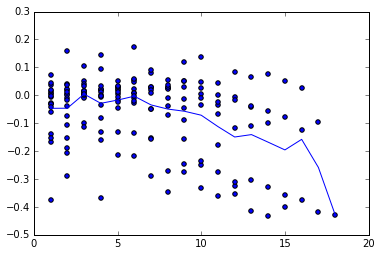

In [255]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []
discrim_electrodes = []
discrim_stims =[]
count = 0
test_dict = {}

electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

# need to make this a function // TODO!!!!
for i in range(18):
    for j in range(19):
        if i<j:
            print count
            count += 1

            org_score = []
            decor_score = []
            #for el_comb in combinations(range(num_of_electrodes),2):
            for el_comb in electrode_combinations:
                stim_1 = i
                stim_2 = j
                num_samples = 40
                org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]])
                org_score.append(org_score_val)
                decor_score.append(decor_score_val)
                #model = sklearn.linear_model.LogisticRegression()
                #model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                #org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
                
                #model = sklearn.linear_model.LogisticRegression()
                #model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                #decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
            
            #discrim_electrodes.append(el_comb)
            discrim_stims.append((stim_1,stim_2))
            discrim_x_examp.append(float(j-i))
            discrim_y_examp.append(np.mean(np.array(org_score)-np.array(decor_score)))
            if not test_dict.has_key(j-i):
                test_dict[j-i] = []
            test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))
                
            discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
            discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.show()


#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


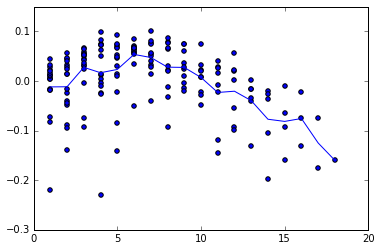

In [256]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []
discrim_electrodes = []
discrim_stims =[]
count = 0
test_dict = {}

electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

for i in range(18):
    for j in range(19):
        if i<j:
            print count
            count += 1

            org_score = []
            decor_score = []
            for el_comb in combinations(range(num_of_electrodeselectrodes_used),2):
            #for el_comb in electrode_combinations:
                stim_1 = i
                stim_2 = j
                num_samples = 40
                org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]])
                org_score.append(org_score_val)
                decor_score.append(decor_score_val)
                #model = sklearn.linear_model.LogisticRegression()
                #model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                #org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
                
                #model = sklearn.linear_model.LogisticRegression()
                #model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                #decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
            
            #discrim_electrodes.append(el_comb)
            discrim_stims.append((stim_1,stim_2))
            discrim_x_examp.append(float(j-i))
            discrim_y_examp.append(np.mean(np.array(org_score)-np.array(decor_score)))
            if not test_dict.has_key(j-i):
                test_dict[j-i] = []
            test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))
                
            discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
            discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.show()


#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

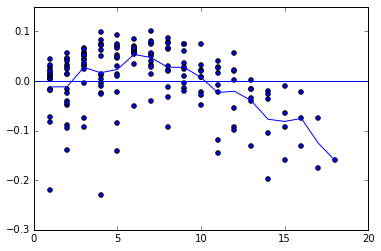

In [257]:
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.axhline(0)
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


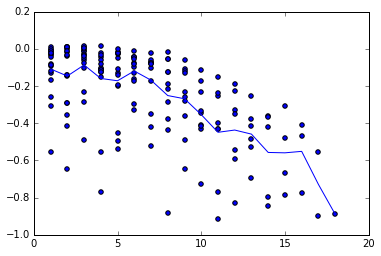

In [241]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []
discrim_electrodes = []
discrim_stims =[]
count = 0
test_dict = {}

electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

for i in range(18):
    for j in range(19):
        if i<j:
            print count
            count += 1

            org_score = []
            decor_score = []
            for el_comb in combinations(range(num_of_electrodes),2):
            #for el_comb in electrode_combinations:
                stim_1 = i
                stim_2 = j
                num_samples = 40
                org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]])
                org_score.append(org_score_val)
                decor_score.append(decor_score_val)
                #model = sklearn.linear_model.LogisticRegression()
                #model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                #org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
                
                #model = sklearn.linear_model.LogisticRegression()
                #model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                #decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
            
            #discrim_electrodes.append(el_comb)
            discrim_stims.append((stim_1,stim_2))
            discrim_x_examp.append(float(j-i))
            discrim_y_examp.append(np.mean(np.array(org_score)-np.array(decor_score)))
            if not test_dict.has_key(j-i):
                test_dict[j-i] = []
            test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))
                
            discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
            discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.show()


#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


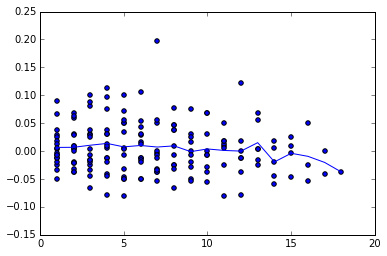

In [223]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []
discrim_electrodes = []
discrim_stims =[]
count = 0
test_dict = {}

electrode_combinations = [(0,1),(5,10),(3,100),(7,88)]

for i in range(18):
    for j in range(19):
        if i<j:
            print count
            count += 1

            org_score = []
            decor_score = []
            #for el_comb in combinations(range(num_of_electrodes),2):
            for el_comb in electrode_combinations:
                stim_1 = i
                stim_2 = j
                num_samples = 40
                #org_score_val, decor_score_val = pair_el_discrim_value(focused_response,stim_1,stim_2,[el_comb[0],el_comb[1]])
                #org_score.append(org_score_val)
                #decor_score.append(decor_score_val)
                model = sklearn.linear_model.LogisticRegression()
                model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
                
                model = sklearn.linear_model.LogisticRegression()
                model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
            
            #discrim_electrodes.append(el_comb)
            discrim_stims.append((stim_1,stim_2))
            discrim_x_examp.append(float(j-i))
            discrim_y_examp.append(np.mean(np.array(org_score)-np.array(decor_score)))
            if not test_dict.has_key(j-i):
                test_dict[j-i] = []
            test_dict[j-i].append(np.mean(np.array(org_score)-np.array(decor_score)))
                
            discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
            discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.plot([i for i in test_dict],[np.mean(np.array(test_dict[i])) for i in test_dict])
plt.show()


#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
#plt.show()
#plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
#plt.show()

In [ ]:
discrim_x_examp = []
discrim_y_examp = []
discrim_y_decor_examp = []
discrim_y_uncor_examp = []
discrim_y_org_examp = []
count = 0
for i in range(18):
    for j in range(18):
        print count
        count += 1
        if i+j<18:
            org_score = []
            decor_score = []
            for el_comb in combinations(range(num_of_electrodes),2):
                stim_1 = i
                stim_2 = j
                num_samples = 40

                model = sklearn.linear_model.LogisticRegression()
                model = model.fit(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                org_score.append(model.score(mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
                
                model = sklearn.linear_model.LogisticRegression()
                model = model.fit(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples))
                decor_score.append(model.score(dec_mod_f_resp[:,[stim_1,stim_2],[el_comb[0],el_comb[1]]].reshape(num_samples*2,-1),np.array([-10]*num_samples+[10]*num_samples)))
            
            
            discrim_x_examp.append(float(i))
            discrim_y_examp.append(np.mean(np.array(org_score)-np.array(decor_score)))
            discrim_y_decor_examp.append(np.mean(np.array(decor_score)))
            discrim_y_uncor_examp.append(np.mean(np.array(org_score)))
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.show()
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_org_examp))
plt.show()
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
plt.show()

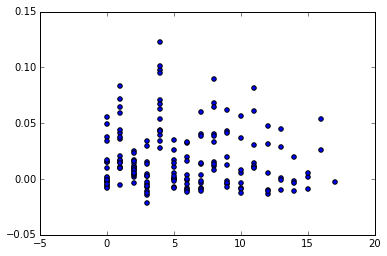

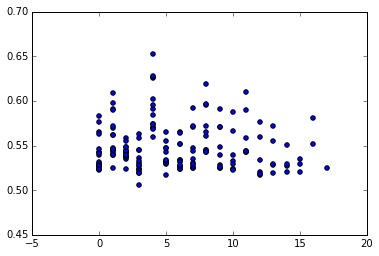

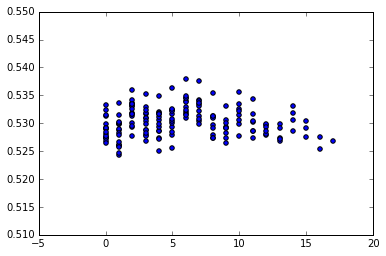

In [455]:
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.show()
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_uncor_examp))
plt.show()
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_decor_examp))
plt.show()

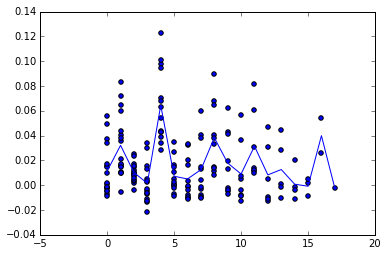

In [457]:
y = []
for x in range(18):
    y.append(np.mean(np.array([j for i,j in zip(discrim_x_examp,discrim_y_examp) if i==x])))
plt.plot(y)
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.show()

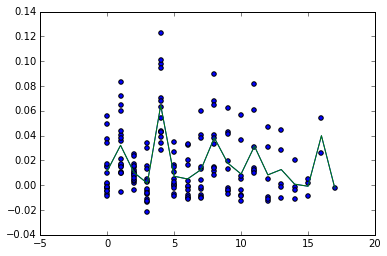

In [459]:
y2 = []
for x in range(18):
    org_val = np.mean(np.array([j for i,j in zip(discrim_x_examp,discrim_y_uncor_examp) if i==x]))
    decor_val = np.mean(np.array([j for i,j in zip(discrim_x_examp,discrim_y_decor_examp) if i==x]))
    y2.append(org_val-decor_val)
plt.plot(y)
plt.plot(y2)
plt.scatter(x = np.array(discrim_x_examp), y = np.array(discrim_y_examp))
plt.show()